# ** Healpy (Python version of HEALPix)**

Healpix software is commonly used in the field of Cosmology

Detail documentation of healpy is available on http://healpy.readthedocs.org/en/latest/tutorial.html.

### **Call the Healpy function**

In [2]:
# Way to initiate Healpy 
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

plt.ion() # To get interactive plotting (otherwise you need to type plt.show() at the end of the plotting commands)

### ** Read a Healpix map **

In [3]:
# download the 100 GHz map from the Planck Legacy Archeive website
m100=hp.read_map('HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=(0,1,2))
np.shape(m100)

(3, 50331648)

In [4]:
#read the map header too
m100,header=hp.read_map('HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=(0,1,2), nest=True, h=True)

In [5]:
hp.read_map

<function healpy.fitsfunc.read_map(filename, field=0, dtype=None, nest=False, partial=False, hdu=1, h=False, verbose=True, memmap=False)>

{'XTENSION': 'BINTABLE', 'BITPIX': 8, 'NAXIS': 2, 'NAXIS1': 12, 'NAXIS2': 50331648, 'PCOUNT': 0, 'GCOUNT': 1, 'TFIELDS': 3, 'COMMENT': '------------------------------------------------------------------------', 'EXTVER': 1, 'DATE': '2017-11-10', 'TTYPE1': 'I_STOKES', 'TTYPE2': 'Q_STOKES', 'TTYPE3': 'U_STOKES', 'TFORM1': 'E', 'TFORM2': 'E', 'TFORM3': 'E', 'TUNIT1': 'Kcmb', 'TUNIT2': 'Kcmb', 'TUNIT3': 'Kcmb', 'EXTNAME': 'FREQ-MAP', 'PIXTYPE': 'HEALPIX', 'POLCCONV': 'COSMO', 'COORDSYS': 'GALACTIC', 'ORDERING': 'NESTED', 'NSIDE': 2048, 'FIRSTPIX': 0, 'LASTPIX': 50331647, 'FILENAME': 'HFI_SkyMap_100_2048_R3.00_full.fits', 'BAD_DATA': -1.6375e+30, 'FREQ': '100', 'PROCVER': 'RD12_RC4', 'UNITFREQ': 'GHz', 'BNDCTR': '100', 'RESTFRQ': 100.89, 'BNDWID': '33', '': ''}


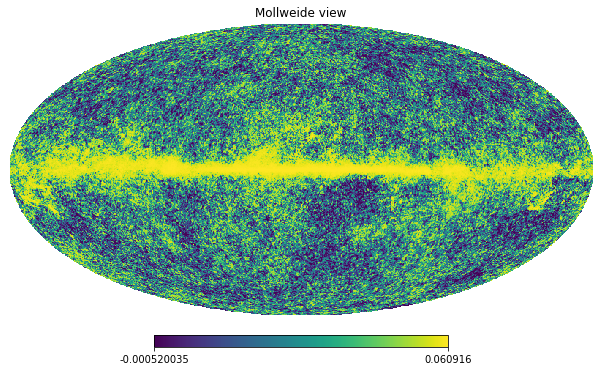

In [6]:
print(dict(header))
hp.mollview(m100[0], cbar=True,nest=True,norm='hist')

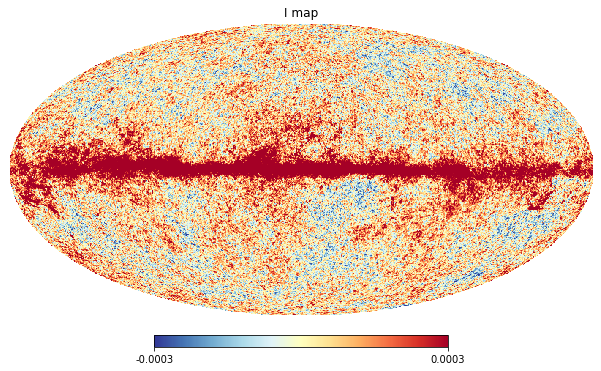

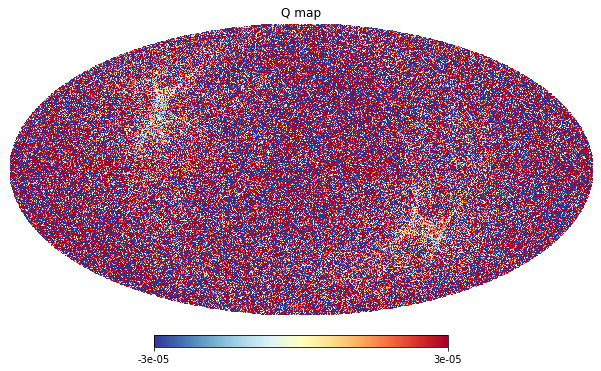

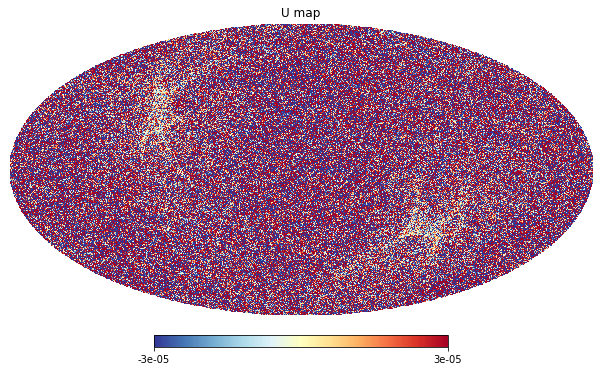

In [7]:
hp.mollview(m100[0],cbar=True,nest=True, min=-3e-4,max=3e-4, title='I map',cmap='RdYlBu_r')
hp.mollview(m100[1],cbar=True,nest=True, min=-3e-5,max=3e-5, title='Q map',cmap='RdYlBu_r')
hp.mollview(m100[2],cbar=True,nest=True, min=-3e-5,max=3e-5, title='U map',cmap='RdYlBu_r')

In [8]:
hp.mollview(m100[0],cbar=True,nest=False, min=-3e-4,max=3e-4, title='I map',cmap='RdYlBu_r')

m100[0,:]- Temperature map - m100[0]= m100[0,:]
m100[1,:]- Stokes Q map - m100[1]
m100[2,:]- Stokes U map - m100[2]

SyntaxError: invalid syntax (3179209782.py, line 3)

In [ ]:
hp.mollview?

### **Difference between ring and nested ordering**

In [ ]:
hp.mollview(m100[0], cbar=True,xsize=1200, min=-3e-4,max=3e-4, title='I map', nest=False)

### **Changing the celestial coordinate system**

In [ ]:
hp.mollview(m100[0],cbar=True,nest=True,min=-3e-4,max=3e-4,title='I map',cmap='RdYlBu_r')
hp.graticule()
hp.mollview(m100[0],cbar=True,nest=True,min=-3e-4,max=3e-4,title='I map',coord=['G','E'],cmap='RdYlBu_r')
hp.graticule()

### **To smooth and repixelize an healpix map**

In [ ]:
m100,header=hp.read_map('HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=(0,1,2), h=True)

In [ ]:
sm100 = hp.smoothing(m100[0], fwhm=np.radians(np.sqrt(5.**2-(10./60.)**2)),lmax=2048)

In [ ]:
hp.mollview(m100[0], min=-3e-4,max=3e-4, title="before smoothing",cmap='RdYlBu_r')
hp.mollview(sm100, min=-3e-4,max=3e-4, title="after smoothing",cmap='RdYlBu_r')

In [ ]:
m_degrad  = hp.ud_grade(sm100,nside_out=64, order_in='RING', pess=True) # repixelize
hp.mollview(m_degrad, min=-3e-4,max=3e-4, title="after repixelisation",cmap='RdYlBu_r')

In [ ]:
gLMC_100=hp.gnomview(m100[0], rot=[280.5,-32.9],reso=3,min=-3e-4,max=5e-4,title='LMC',cmap='RdYlBu_r')

In [ ]:
m100,header100=hp.read_map('HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=(0), h=True)
m70,header73=hp.read_map('LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=(0), h=True)
sm353 = hp.smoothing(m353, fwhm=np.radians(np.sqrt((15./60.)**2-(5./60.)**2)),lmax=2048)
sm70 = hp.smoothing(m70, fwhm=np.radians(np.sqrt((15./60.)**2-(13./60.)**2)),lmax=2048)
ud100  = hp.ud_grade(sm100,nside_out=1024, order_in='RING') 
ud353  = hp.ud_grade(sm353,nside_out=1024, order_in='RING') 

In [ ]:
gLMC=hp.gnomview(m353, rot=[280.5,-32.9],reso=3,min=-3e-3,max=5e-3,title='LMC',cmap='RdYlBu_r')

In [ ]:
crab=hp.gnomview(m353, rot=[184.5,-5.8],reso=0.3,min=-3e-2,max=5e-2,title='Crab Nebula',cmap='RdYlBu_r')

In [ ]:
Tauras=hp.gnomview(m353, rot=[173,-15.2],reso=5,min=-2e-2,max=2e-2,title='Tauras',cmap='RdYlBu_r')
#Tauras=hp.gnomview(ud100-sm70, rot=[173,-15.2],reso=5,min=-3e-4,max=5e-4,title='Tauras',cmap='RdYlBu_r')

In [ ]:
#u100  = hp.ud_grade(m100,nside_out=1024, order_in='RING') 
#andromeda=hp.gnomview(ud100-sm70, rot=[121.2,-21.6],reso=3,min=-1e-4,max=1e-4,title='Andromeda',cmap='RdYlBu_r')
andromeda=hp.gnomview(m353, rot=[121.2,-21.6],reso=3,min=-1e-2,max=1e-2,title='Andromeda',cmap='RdYlBu_r')

In [ ]:
Coma=hp.gnomview(m353, rot=[8.2,89.6],reso=1,min=-3e-3,max=3e-3,title='Coma cluster',cmap='RdYlBu_r')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

m070=hp.read_map('LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=(0))
m100=hp.read_map('HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=(0))
m143=hp.read_map('HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits',field=(0))
m217=hp.read_map('HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits',field=(0))
m353=hp.read_map('HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits',field=(0))

sm070 = hp.smoothing(m070, fwhm=np.radians(np.sqrt((15./60.)**2-(13./60.)**2)),lmax=2048)
sm100 = hp.smoothing(m100, fwhm=np.radians(np.sqrt((15./60.)**2-(10./60.)**2)),lmax=2048)
sm143 = hp.smoothing(m143, fwhm=np.radians(np.sqrt((15./60.)**2-(7./60.)**2)),lmax=2048)
sm217 = hp.smoothing(m217, fwhm=np.radians(np.sqrt((15./60.)**2-(5./60.)**2)),lmax=2048)
sm353 = hp.smoothing(m353, fwhm=np.radians(np.sqrt((15./60.)**2-(5./60.)**2)),lmax=2048)

ud070  = hp.ud_grade(sm070,nside_out=1024, order_in='RING') 
ud100  = hp.ud_grade(sm100,nside_out=1024, order_in='RING') 
ud143  = hp.ud_grade(sm143,nside_out=1024, order_in='RING') 
ud217  = hp.ud_grade(sm217,nside_out=1024, order_in='RING') 
ud353  = hp.ud_grade(sm353,nside_out=1024, order_in='RING')


### **Power spectrum estimation** ###

In [ ]:
cl= hp.anafast(m100[0], lmax=4096)

In [ ]:

ell_best, dl_best = np.loadtxt('COM_PowerSpect_CMB-TT-full_R3.01.txt',usecols=(0,1), unpack=True,skiprows=1)

ell=np.arange(4096)
p1 =plt.loglog(ell, ell*(ell+1)*cl*1.e12/(2.*np.pi), linestyle='solid', color='b', label = 'ILC map')
p2 =plt.loglog(ell_best, dl_best, linestyle='solid', color='k', label = 'Planck best fit')


plt.xlim(xmin=3,xmax=2000.)
plt.ylim(ymin=200,ymax=7000)
plt.xlabel(r'Multipole, $\ell$')
plt.ylabel(r'$\ell (\ell+1) C_{\ell}/2\pi$ [in $\mu K^2$]')
plt.legend()
plt.show()


pip install --user healpy

In [ ]:
ell_best, dl_best = np.loadtxt('COM_PowerSpect_CMB-TT-full_R3.01.txt',usecols=(0,1), unpack=True,skiprows=1)

beam=hp.gauss_beam(np.radians(10./60.),lmax=2048)

ell=np.arange(2049)
p1 =plt.loglog(ell, ell*(ell+1)*cl*1.e12/(2.*np.pi)/beam**2, linestyle='solid', color='b', label = 'beam-corrected ILC map')
p2 =plt.loglog(ell_best, dl_best, linestyle='solid', color='k', label = 'Planck best fit')


plt.xlim(xmin=3,xmax=2000.)
plt.ylim(ymin=200,ymax=7000)
plt.xlabel(r'Multipole, $\ell$')
plt.ylabel(r'$\ell (\ell+1) C_{\ell}/2\pi$ [in $\mu K^2$]')
plt.legend()
plt.show()